In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import GridEnv
from ql import QLearning

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.],
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.],
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.]
])

## Deterministic Environment

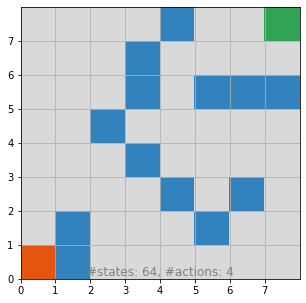

In [3]:
deterministic_env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=50,
)

### Q-Learning

In [13]:
ql = QLearning(
    env=deterministic_env,
    epsilon_start=1.0,
    epsilon_decay=0.995,
    gamma=0.9,
    step_size=0.1,
    episodes=4000,
)

# train 
policy_ql, Q_ql = ql.run()
# evaluate
ql.evaluate()

In [14]:
_, action_seq = ql.evaluate_one_episode()
ql.env.animate(action_seq=action_seq, filename='ql.mp4')
Video('ql.mp4')

#### Visualisations

No handles with labels found to put in legend.


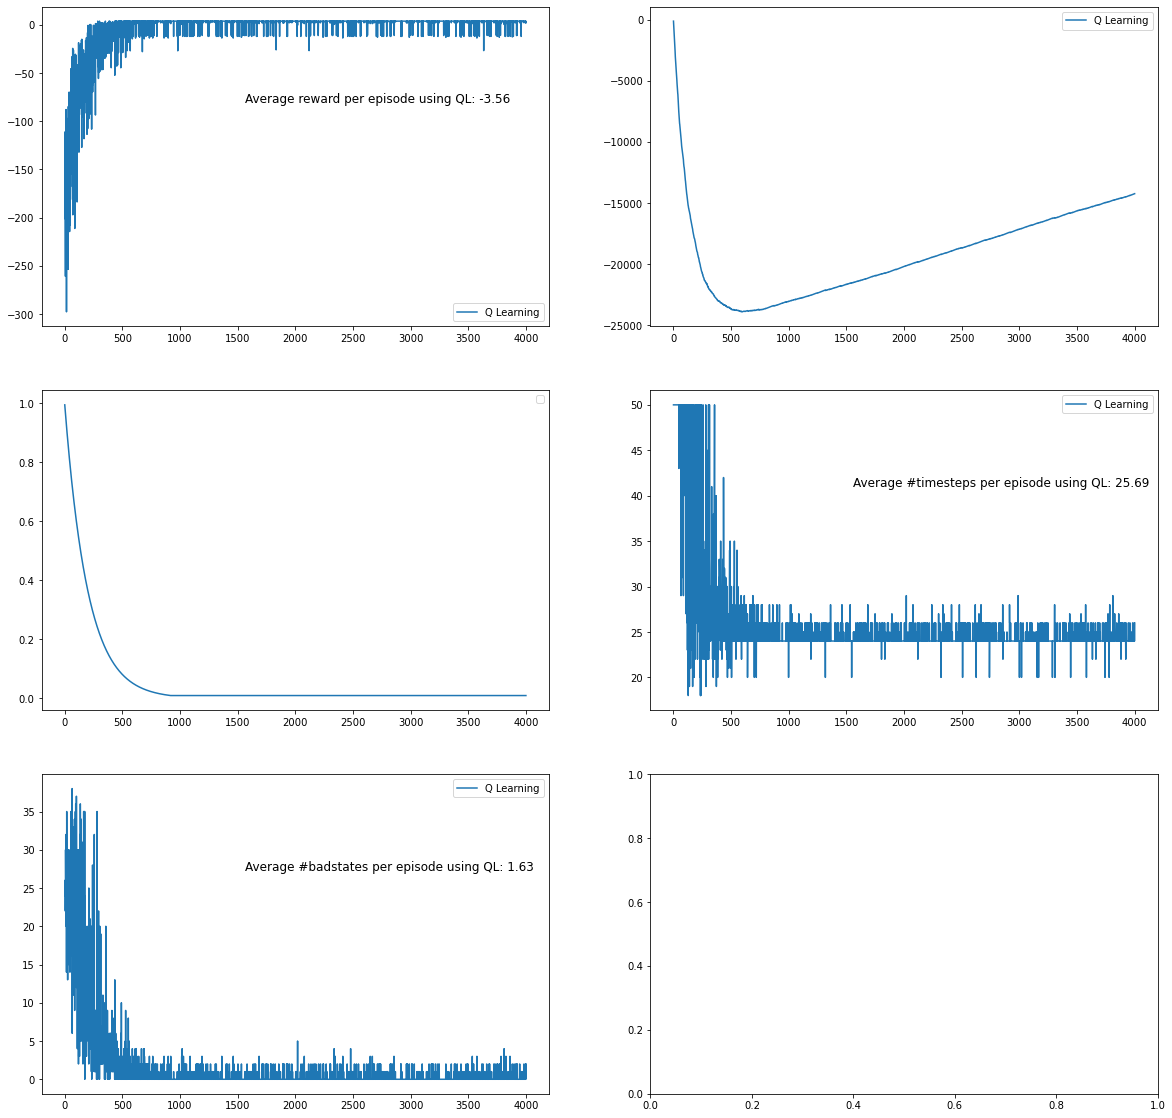

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

total_rewards = [log['reward'] for _, log in ql.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(ql.episodes), total_rewards, label='Q Learning')
ax[0][0].text(0.4, 0.7, f'Average reward per episode using QL: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].legend()

cumulative_rewards = [log['cumulative_reward'] for _, log in ql.logs.items()]
ax[0][1].plot(range(ql.episodes), cumulative_rewards, label='Q Learning')
ax[0][1].legend()

ax[1][0].plot(range(ql.episodes), [log['epsilon'] for _, log in ql.logs.items()])
ax[1][0].legend()

timesteps = [log['timesteps'] for _, log in ql.logs.items()]
mean_timesteps = sum(timesteps)/len(timesteps)
ax[1][1].plot(range(ql.episodes), timesteps, label='Q Learning')
ax[1][1].text(0.4, 0.7, f'Average #timesteps per episode using QL: {round(mean_timesteps, 2)}', transform=ax[1][1].transAxes, size='large')
ax[1][1].legend()

bad_state_count = [log['bad_state_count'] for _, log in ql.logs.items()]
mean_bad_states_count = sum(bad_state_count)/len(bad_state_count)
ax[2][0].plot(range(ql.episodes), [log['bad_state_count'] for _, log in ql.logs.items()], label='Q Learning')
ax[2][0].text(0.4, 0.7, f'Average #badstates per episode using QL: {round(mean_bad_states_count, 2)}', transform=ax[2][0].transAxes, size='large')
ax[2][0].legend()